# 문제 01 유형
- DataSet_01.csv 이용

In [1]:
import pandas as pd

df1 = pd.read_csv('datasets/Dataset_01.csv', encoding='utf8')
df1.head(3)

,TV,Radio,Social_Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social_Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


## 1. 데이터 세트 내 총 결측값의 개수

In [4]:
# df1.isnull().sum()
df1.isna().sum()

TV              10
Radio            4
Social_Media     6
Influencer       0
Sales            6
dtype: int64

### 답
26

### 참고
- 각 행의 결측값 개수

In [9]:
df1.isna().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
4567    0
4568    0
4569    0
4570    0
4571    0
Length: 4572, dtype: int64

- 결측값이 있는 행의 개수

In [12]:
df1.isna().any(axis=1).sum()

26

- 결측값이 있는 열의 개수

In [13]:
df1.isna().any(axis=0).sum()

4

## 2. 매출액과 가장 강한 상관관계를 가지고 있는 채널의 상관계수
- 소수점 5번째 자리에서 반올림하여 소수점 넷째 자리까지 기술

In [31]:
cor1 = df1.corr().abs()
cor1

,TV,Radio,Social_Media,Sales
TV,1.000000,0.869460,0.528168,0.999497
Radio,0.869460,1.000000,0.607452,0.869105
Social_Media,0.528168,0.607452,1.000000,0.528906
Sales,0.999497,0.869105,0.528906,1.000000


In [32]:
cor1['Sales'].sort_values(ascending=False)

Sales           1.000000
TV              0.999497
Radio           0.869105
Social_Media    0.528906
Name: Sales, dtype: float64

In [33]:
# 내림차순으로 정리한 후 Sales 다음으로 상관계수가 큰 값
cor1['Sales'].sort_values(ascending=False)[1]

0.999497444941335

In [35]:
# 값이 큰 순서대로 2개를 뽑은 후 두번째 값
cor1['Sales'].nlargest(2)[-1]

0.999497444941335

### 답
0.9995

### 참고
- 절댓값을 줘서 상관성이 가장 큰 변수 확인
- corr()
    - method : {'pearson', 'kendall', 'spearman'}

In [28]:
df1.drop(columns=['Influencer']).corr().abs()

,TV,Radio,Social_Media,Sales
TV,1.000000,0.869460,0.528168,0.999497
Radio,0.869460,1.000000,0.607452,0.869105
Social_Media,0.528168,0.607452,1.000000,0.528906
Sales,0.999497,0.869105,0.528906,1.000000


In [29]:
df1.drop(columns=['Influencer']).corr(method='spearman')

,TV,Radio,Social_Media,Sales
TV,1.000000,0.874133,0.528866,0.999495
Radio,0.874133,1.000000,0.605050,0.873859
Social_Media,0.528866,0.605050,1.000000,0.529576
Sales,0.999495,0.873859,0.529576,1.000000


## 3. 매출액을 종속변수, TV, Radio, Social_Media의 예산을 독립변수로 하여 회귀분석을 수행
- 회귀계수를 큰 것부터 작은 것 순으로 기술
- 결측치가 포함된 행은 제거, 회귀계수는 소수점 넷째 자리 이하는 버리고 셋째 자리까지 기술

In [6]:
df1_dropna = df1.dropna(axis=0)
df1_dropna.isnull().sum()

TV              0
Radio           0
Social_Media    0
Influencer      0
Sales           0
dtype: int64

In [38]:
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS, add_constant
from statsmodels.formula.api import ols

X = df1_dropna.drop(columns=['Influencer', 'Sales'])
y = df1_dropna['Sales']

### 사이킷런

In [40]:
# sklearn
lr = LinearRegression(fit_intercept=True) # 절편
lr.fit(X, y)
lr.coef_, lr.intercept_

(array([ 3.56256963, -0.00397039,  0.00496402]), -0.13396305194211777)

### 답1
3.562, 0.004, -0.003

### statsmodels.api

In [42]:
# statsmodels.api
# 절편을 위해 add_constant를 추가해야 함
XX = add_constant(X)
XX.head(3)

,const,TV,Radio,Social_Media
0,1.0,16.0,6.566231,2.907983
1,1.0,13.0,9.237765,2.409567
2,1.0,41.0,15.886446,2.913410


In [43]:
# 절편 없이
ols1 = OLS(y, X).fit()
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.951e+06
Date:                Mon, 23 Aug 2021   Prob (F-statistic):                        0.00
Time:                        10:48:00   Log-Likelihood:                         -11367.
No. Observations:                4546   AIC:                                  2.274e+04
Df Residuals:                    4543   BIC:                                  2.276e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
TV               3.5609      0.003   1133.941      0.000       3.555       3.567
Radio           -0.0039      0.010     -0.400      0.689      -0.023       0.015
Social_Media    -0.0013      0.024     -0.054      0.957      -0.049       0.047
==============================================================================
Omnibus:                        0.061   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.970   Jarque-Bera (JB):                0.038
Skew:                          -0.001   Prob(JB):                        0.981
Kurtosis:                       3.014   Cond. No.                         35.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# 절편 포함
ols2 = OLS(y, XX).fit()
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.505e+06
Date:                Mon, 23 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:52:51   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4542   BIC:                         2.277e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1340      0.103     -1.303      0.193      -0.336       0.068
TV               3.5626      0.003   1051.118      0.000       3.556       3.569
Radio           -0.0040      0.010     -0.406      0.685      -0.023       0.015
Social_Media     0.0050      0.025      0.199      0.842      -0.044       0.054
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.034
Skew:                          -0.001   Prob(JB):                        0.983
Kurtosis:                       3.013   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### statsmodels.formula.api

In [59]:
# formula = 'Sales ~ TV + Radio + Social_Media'
feature_list = list(X.columns)
formula = 'Sales~' + '+'.join(feature_list)
ols3 = ols(formula, df1_dropna).fit()
ols3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.505e+06
Date:                Mon, 23 Aug 2021   Prob (F-statistic):               0.00
Time:                        11:39:12   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4542   BIC:                         2.277e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1340      0.103     -1.303      0.193      -0.336       0.068
TV               3.5626      0.003   1051.118      0.000       3.556       3.569
Radio           -0.0040      0.010     -0.406      0.685      -0.023       0.015
Social_Media     0.0050      0.025      0.199      0.842      -0.044       0.054
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.034
Skew:                          -0.001   Prob(JB):                        0.983
Kurtosis:                       3.013   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 답2
3.562, 0.005, -0.004

- 답1과 다른데, 보통 어떤 함수를 써서 구해라/반올림해라 하기 때문에 상관 없다

### 참고
- Prob(F-statistic) : 독립변수들이 종속변수에 영향을 주는지 파악
    - 귀무가설 : $\beta_1=\beta_2=...=0$
    - 대립가설 : 적어도 하나의 $\beta$는 0이 아니다.
- P>|t| : 종속변수에 영향을 주는 독립변수 개수 파악
    - 귀무가설 : $\beta_i=0$
    - 대립가설 : $\beta_i \ne 0$
- R-squared : 결정계수
    - $R^2 = \dfrac{\text{SSR}}{\text{SST}}=1-\dfrac{\text{SSE}}{\text{SST}}$

# 문제 02 유형
- Dataset_02.csv 이용

In [14]:
df2 = pd.read_csv('datasets/Dataset_02.csv', encoding='utf8')
df2.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## 1. 여성/혈압 High/Cholesterol Normal인 환자의 비율
- 소수점 네 번째 자리에서 반올림하여 소수점 셋째 자리까지 기술

In [61]:
cond1 = (df2['Sex'] == 'F')
cond2 = (df2['BP'] == 'HIGH')
cond3 = (df2['Cholesterol'] == 'NORMAL')

pat = df2[cond1 & cond2 & cond3].shape[0]
pat

21

In [62]:
ratio = pat / df2.shape[0]
print(f'{ratio:.4f}')

0.1050


### 답
0.105

### 참고

#### crosstab

In [63]:
# 빈도 확인
crosstab = pd.crosstab(index=df2['Sex'],
                       columns=df2['Cholesterol'])

crosstab

Cholesterol,HIGH,NORMAL
Sex,,
F,49,47
M,54,50


In [64]:
# 비율 확인
crosstab = pd.crosstab(index=df2['Sex'],
                       columns=df2['Cholesterol'],
                      normalize=True)

crosstab

Cholesterol,HIGH,NORMAL
Sex,,
F,0.245,0.235
M,0.270,0.250


In [65]:
# 3개 이상 변수 확인
crosstab = pd.crosstab(index=df2['Sex'],
                       columns=[df2['Cholesterol'], df2['BP']],
                      normalize=True)

crosstab

Cholesterol   HIGH               NORMAL              
BP            HIGH    LOW NORMAL   HIGH    LOW NORMAL
Sex                                                  
F            0.085  0.070  0.090  0.105  0.070   0.06
M            0.090  0.085  0.095  0.105  0.095   0.05

In [67]:
# 또는
crosstab = pd.crosstab(index=[df2['Sex'], df2['BP']],
                       columns=df2['Cholesterol'],
                      normalize=True)

crosstab

Cholesterol   HIGH  NORMAL
Sex BP                    
F   HIGH     0.085   0.105
    LOW      0.070   0.070
    NORMAL   0.090   0.060
M   HIGH     0.090   0.105
    LOW      0.085   0.095
    NORMAL   0.095   0.050

Sex=F, BP=HIGH, Cholesterol=NORMAL : 0.105

#### pivot table

In [75]:
import numpy as np

pivot = pd.pivot_table(index=['Sex', 'BP'],
                      columns=['Cholesterol'],
                       values=['Age', 'Drug'],
                       aggfunc={'Age':np.mean, 'Drug':'count'},
                      data=df2)

pivot

Age            Drug       
Cholesterol       HIGH     NORMAL HIGH NORMAL
Sex BP                                       
F   HIGH     41.941176  34.523810   17     21
    LOW      46.785714  45.428571   14     14
    NORMAL   45.166667  45.333333   18     12
M   HIGH     50.666667  42.952381   18     21
    LOW      47.235294  48.210526   17     19
    NORMAL   41.105263  46.300000   19     10

In [78]:
pivot = pd.pivot_table(index=['Sex', 'BP'],
                      columns=['Cholesterol'],
                       values=['Drug'],
                       aggfunc='count',
                      data=df2)

pivot/len(df2)

Drug       
Cholesterol   HIGH NORMAL
Sex BP                   
F   HIGH     0.085  0.105
    LOW      0.070  0.070
    NORMAL   0.090  0.060
M   HIGH     0.090  0.105
    LOW      0.085  0.095
    NORMAL   0.095  0.050

In [76]:
pd.pivot_table?

## 2. Age, Sex, BP, Cholesterol, Na_to_k가 Drug 타입에 영향을 미치는지 확인
- Age_gr column을 생성
    - 20 미만은 10, 20 이상 30 미만은 20, ..., 60 이상은 60으로
- Na_K_gr column을 생성
    - 10 이하는 Lv1, 20 이하는 Lv2, 30 이하는 Lv3, 30 초과는 Lv4로
- 독립성 검정 수행
- 연관성 있는 변수 개수와 연관성이 가장 큰 변수의 p-value를 찾아 소수점 여섯 번째 자리 이하는 버리고 소수점 다섯 번째 자리에서 기술

### 변수 생성

In [24]:
def age_gr(age):
    if age < 20:
        return '10'
    elif age < 30:
        return '20'
    elif age < 40:
        return '30'
    elif age < 50:
        return '40'
    elif age < 60:
        return '50'
    else:
        return '60'

def na_k_gr(nak):
    if nak <= 10:
        return 'Lv1'
    elif nak <=20:
        return 'Lv2'
    elif nak <=30:
        return 'Lv3'
    else:
        return 'Lv4'

In [27]:
df2_pre = df2.copy()
df2_pre['Age_gr'] = df2_pre['Age'].apply(lambda x:age_gr(x))
df2_pre['Na_K_gr'] = df2_pre['Na_to_K'].apply(lambda x:na_k_gr(x))

df2_pre.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age_gr,Na_K_gr
0,23,F,HIGH,HIGH,25.355,DrugY,20,Lv3
1,47,M,LOW,HIGH,13.093,drugC,40,Lv2
2,47,M,LOW,HIGH,10.114,drugC,40,Lv2


In [79]:
# 다른 방법 1 - np.where() 이용
df2_copy1 = df2.copy()

df2_copy1['Age_gr'] = np.where(df2_copy1['Age']<20, '10',
                              np.where(df2_copy1['Age']<30, '20',
                                  np.where(df2_copy1['Age']<40, '30',
                                        np.where(df2_copy1['Age']<50, '40',
                                            np.where(df2_copy1['Age']<60, '50',
                                                    '60')))))
df2_copy1.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age_gr
0,23,F,HIGH,HIGH,25.355,DrugY,20
1,47,M,LOW,HIGH,13.093,drugC,40
2,47,M,LOW,HIGH,10.114,drugC,40


In [83]:
# 다른 방법 2 - pandas cut() 이용
df2_copy2 = df2.copy()

# pd.cut(x, bins, right=True, labels=None)
# bins = [x1, x2, x3, ..., xn] : x1 이상 x2 미만, x2 이상 x3 미만, ...
df2_copy2['Age_gr'] = pd.cut(df2_copy2['Age'],
                       [0, 20, 30, 40, 50, 60, df2_copy2['Age'].max()+1],
                       right=False,
                      labels=['10', '20', '30', '40', '50', '60'])

df2_copy2.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age_gr
0,23,F,HIGH,HIGH,25.355,DrugY,20
1,47,M,LOW,HIGH,13.093,drugC,40
2,47,M,LOW,HIGH,10.114,drugC,40


### 독립성 검정
- $P(A\cap X)=n(A\cap X) / \Sigma$
    - $A, B, ...$ : 변수 1의 범주들
    - $X, Y, ...$ : 변수 2의 범주들
    - $\Sigma$ : 전체 빈도 합
    - 독립인 경우 $P(A\cap X)=P(A)$임을 이용
- 귀무가설 : 범주와 관계 없이 빈도는 동일하다. (범주간 독립이다)
- 대립가설 : 범주에 따라 빈도가 달라진다. (범주간 독립이 아니다 / 연관이 있다)
- x, y 모두 범주형 변수일 경우 사용
- x가 여럿일 경우, 따로 계산해줘야 함
- `scipy.stats`의 `chi2_contingency()` 이용
    - crosstab이나 pivot table 같은 빈도 테이블을 필요로 함
- `TIL/Python Statistics/ch11. 통계적 가설검정.ipynb`의 마지막 `3-5. 카이제곱검정` 확인

In [85]:
import scipy.stats as sc

def cal_chi2(df, var1, var2='Drug'):
    ct = pd.crosstab(index=df[var1], columns=df[var2])
    result = sc.chi2_contingency(ct)
    return result

In [93]:
result_df1_values = {'variable':[], 'p-value':[]}

for var in ['Age_gr', 'Sex', 'BP', 'Cholesterol', 'Na_K_gr']:
    # 결과는 검정통계량(카이제곱), p-value, dof, 기대도수
    chi2, pvalue, dof, E = cal_chi2(df2_pre, var)
    print(f'{var:11}의 독립성검정 p-value : {pvalue:.6f}')
    result_df1_values['variable'].append(var)
    result_df1_values['p-value'].append(pvalue)

result_df1 = pd.DataFrame(result_df1_values)
result_df1

Age_gr     의 독립성검정 p-value : 0.000701
Sex        의 독립성검정 p-value : 0.713837
BP         의 독립성검정 p-value : 0.000000
Cholesterol의 독립성검정 p-value : 0.000596
Na_K_gr    의 독립성검정 p-value : 0.000000


,variable,p-value
0,Age_gr,7.010113e-04
1,Sex,7.138370e-01
2,BP,5.041733e-27
3,Cholesterol,5.962588e-04
4,Na_K_gr,1.125464e-14


In [95]:
result_df1_2 = result_df1[result_df1['p-value'] < 0.05]
result_df1_2

,variable,p-value
0,Age_gr,7.010113e-04
2,BP,5.041733e-27
3,Cholesterol,5.962588e-04
4,Na_K_gr,1.125464e-14


In [96]:
len(result_df1_2), result_df1_2.sort_values(by='p-value', ascending=False)['p-value'][0] 

(4, 0.0007010113024729462)

### 답
4, 0.00070

## 3. 의사결정나무를 이용한 분석 수행
- Sex_cd : M=0, F=1
- BP_cd : LOW=0, NORMAL=1, HIGH=2
- Ch_cd : NORMAL=0, HIGH=1
- Age, Na_to_k, Sex_cd, BP_cd, Ch_cd를 Feature로, Drug를 Label로 하여 의사결정나무 수행
- Root Node의 split feature와 split value 기술
- split value는 소수점 셋째 자리까지 반올림

In [46]:
df2_pre['Sex_cd'] = df2_pre['Sex'].replace({'M':0, 'F':1})
df2_pre['BP_cd'] = df2_pre['BP'].replace({'LOW':0, 'NORMAL':1, 'HIGH':2})
df2_pre['Ch_cd'] = df2_pre['Cholesterol'].replace({'NORMAL':0, 'HIGH':1})

X_features = df2_pre[['Age', 'Na_to_K', 'Sex_cd', 'BP_cd', 'Ch_cd']]
y_label = df2_pre['Drug']

In [47]:
X_features.head(3)

,Age,Na_to_K,Sex_cd,BP_cd,Ch_cd
0,23,25.355,1,2,1
1,47,13.093,0,0,1
2,47,10.114,0,0,1


In [99]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text # ,export_graphviz

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_features, y_label)

DecisionTreeClassifier()

In [107]:
export_text(dt_clf, feature_names=list(X_features.columns), decimals=4)

'|--- Na_to_K <= 14.8285\n|   |--- BP_cd <= 1.5000\n|   |   |--- BP_cd <= 0.5000\n|   |   |   |--- Ch_cd <= 0.5000\n|   |   |   |   |--- class: drugX\n|   |   |   |--- Ch_cd >  0.5000\n|   |   |   |   |--- class: drugC\n|   |   |--- BP_cd >  0.5000\n|   |   |   |--- class: drugX\n|   |--- BP_cd >  1.5000\n|   |   |--- Age <= 50.5000\n|   |   |   |--- class: drugA\n|   |   |--- Age >  50.5000\n|   |   |   |--- class: drugB\n|--- Na_to_K >  14.8285\n|   |--- class: DrugY\n'

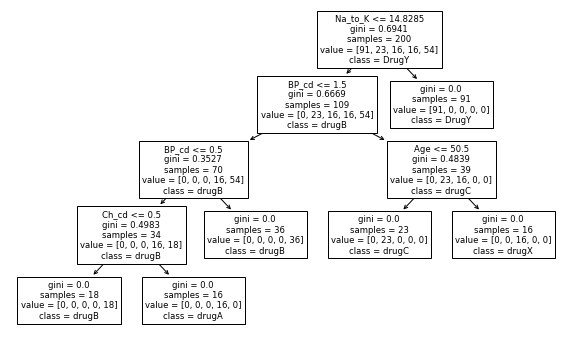

In [113]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plot_tree(dt_clf, feature_names=list(X_features.columns), class_names=y_label.unique(), precision=4)
plt.show()

### 답
Na_to_K, 14.829

# 문제 03 유형
- Dataset_03.csv 이용

In [114]:
import pandas as pd

df3 = pd.read_csv('datasets/Dataset_03.csv', encoding='utf8')
df3.head(3)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male


In [115]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


## 1. 이마의 폭과 높이 비율에 대해, 평균으로부터 3 표준편차 밖의 경우를 이상치로 정의
- 이상치에 해당하는 데이터는 몇 개인가

In [116]:
df3['forehead_ratio'] = df3['forehead_width_cm'] / df3['forehead_height_cm']

forehead_ratio_avg = df3['forehead_ratio'].mean()
forehead_ratio_std = df3['forehead_ratio'].std()

forehead_ratio_avg, forehead_ratio_std

(2.233618718921451, 0.2645252969973522)

In [117]:
upper = forehead_ratio_avg + 3 * forehead_ratio_std
lower = forehead_ratio_avg - 3 * forehead_ratio_std
cond1 = (df3['forehead_ratio'] > upper)
cond2 = (df3['forehead_ratio'] < lower)

forehead_outlier = df3[cond1 | cond2]
len(forehead_outlier)

3

### 답
3

## 2. 성별에 따라 forehead_ratio 평균에 차이가 있는지 검정
- 이분산 가정
- 검정통계량 추정치는 절댓값을 취한 후 소수점 셋째 자리에서 반올림
- 신뢰수준 99%에서 양측 검정을 수행한 후 귀무가설 기각하면 Y, 아니면 N

In [120]:
from scipy.stats import ttest_ind

df3_male = df3[df3['gender'] == 'Male']['forehead_ratio']
df3_female = df3[df3['gender'] == 'Female']['forehead_ratio']

t, p = ttest_ind(df3_male, df3_female, equal_var=False)
t, p

(2.9994984197511543, 0.0027186702390657176)

### 답

3.00, Y

### 참고
- 독립 표본 t검정인지, 대응 표본 t검정인지 판단해야함
- 대응 : 분산을 고려하지 않음
- 독립 : 분산을 고려해야 함 >> 이분산 가정이라는 것에서 독립 표본 t검정임을 확인

```python
# 독립 표본 t검정
from scipy.stats import ttest_1samp, ttest_rel
t, p = ttest_rel(X, Y)
# t, p = ttest_1samp(X-Y, 0) # X, Y의 길이가 같아야함

# 대응 표본 t검정, 양측검정
from scipy.stats import ttest_ind
t, p = ttest_ind(X, Y, equal_var=False, alternative='two-sided')
```

## 3. 성별 구분을 로지스틱 회귀분석 적용
- train:test = 7:3, seed=123
- forehead_ratio를 제외한 7개 변수를 feature로, gender를 label로
- 예측 수행, 정확도 평가 (임계값 0.5)
- male에 대해 precision 값을 소수점 둘째 자리까지 반올림

In [233]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

X_features = df3.drop(columns=['gender', 'forehead_ratio'])
# y_label = df3['gender'].replace({'Male':1, 'Female':0})
y_label = df3['gender']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                    test_size=0.3,
                                                   random_state=123)

X_train.shape

(3500, 7)

In [234]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
# pred_proba = lr_clf.predict_proba(X_test)[:, 1]
# pred = np.where(pred_proba>=0.5, 'Male', 'Female').reshape(-1, 1)
# precision_score(y_test, pred)
precision_score(y_test, pred, pos_label='Male')

0.9596354166666666

### 답
0.96

### 참고

In [235]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred, digits=3, target_names=['Female', 'Male']))

              precision    recall  f1-score   support

      Female      0.971     0.958     0.965       743
        Male      0.960     0.972     0.966       758

    accuracy                          0.965      1501
   macro avg      0.965     0.965     0.965      1501
weighted avg      0.965     0.965     0.965      1501



In [236]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[712,  31],
       [ 21, 737]], dtype=int64)

# 문제 04 유형
- DataSet_04.csv 이용

In [139]:
import pandas as pd

df4 = pd.read_csv('datasets/Dataset_04.csv', encoding='utf8')
df4.head(3)

,LOCATION,SUBJECT,TIME,Value
0,AUS,BEEF,1991,27.721815
1,AUS,BEEF,1992,26.199591
2,AUS,BEEF,1993,26.169094


In [140]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  6718 non-null   object 
 1   SUBJECT   6718 non-null   object 
 2   TIME      6718 non-null   int64  
 3   Value     6718 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 210.1+ KB


## 1. 연도별 육류 소비량 합계를 구하여 TIME과 Value간 상관분석
- 한국 데이터만 추출
- 상관계수를 소수점 셋째 자리에서 반올림하여 소수점 둘째 자리까지

In [177]:
df4_kor = df4[df4['LOCATION'] == 'KOR']
len(df4_kor)

146

In [178]:
df4_kor['TIME'].unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024, 2025, 2026, 1990], dtype=int64)

In [179]:
df4_kor_year = df4_kor.groupby('TIME').sum().reset_index()
df4_kor_year.head(3)

,TIME,Value
0,1990,5.774255
1,1991,21.911207
2,1992,26.901769


In [180]:
len(df4_kor_year)

37

In [181]:
df4_kor_year.corr()

,TIME,Value
TIME,1.000000,0.960124
Value,0.960124,1.000000


### 답
0.96

## 2. 한국과 일본을 비교하여 연도별 소비량 평균 차이 분석
- 육류별 소비량을 연도 기준으로 비교
- 연도별 소비량 차이가 없는 것으로 판단할 수 있는 육류를 알파벳 순으로 나열

In [182]:
df4_jpn = df4[df4['LOCATION'] == 'JPN']
df4_jpn.head(3)

,LOCATION,SUBJECT,TIME,Value
294,JPN,BEEF,1990,6.111035
295,JPN,BEEF,1991,6.517055
296,JPN,BEEF,1992,6.766244


In [184]:
df4_kor.rename(columns={'Value':'KOR'}, inplace=True)
df4_jpn.rename(columns={'Value':'JPN'}, inplace=True)

df4_kor_jpn = pd.merge(df4_kor, df4_jpn, how='inner', on=['SUBJECT', 'TIME'])
df4_kor_jpn.head(3)

,LOCATION_x,SUBJECT,TIME,KOR,LOCATION_y,JPN
0,KOR,BEEF,1991,5.085481,JPN,6.517055
1,KOR,BEEF,1992,5.685434,JPN,6.766244
2,KOR,BEEF,1993,5.325765,JPN,7.406407


In [185]:
from scipy.stats import ttest_rel
def ttest_nation(df, subject, nat1, nat2):
    nat1 = df[df['SUBJECT']==subject][nat1]
    nat2 = df[df['SUBJECT']==subject][nat2]
    t, p = ttest_rel(nat1, nat2)
    return t, p

In [188]:
for subject in df4_kor_jpn['SUBJECT'].unique():
    t, p = ttest_nation(df4_kor_jpn, subject, 'KOR', 'JPN')
    print(f'{subject:7}에 대한 t 검정 결과 p-value : {p:.4f}')
    if p >= 0.05:
        print('\t\t소비량 차이가 없음')
    print()

BEEF   에 대한 t 검정 결과 p-value : 0.0004

PIG    에 대한 t 검정 결과 p-value : 0.0000

POULTRY에 대한 t 검정 결과 p-value : 0.4691
		소비량 차이가 없음

SHEEP  에 대한 t 검정 결과 p-value : 0.0000



### 답
POULTRY

### 참고

In [213]:
df4_kor_jpn_2 = df4[df4['LOCATION'].isin(['KOR', 'JPN'])]
df4_3 = pd.pivot_table(data=df4_kor_jpn_2, index=['TIME', 'SUBJECT'],
                      columns=['LOCATION'], values='Value')
df4_3

LOCATION            JPN        KOR
TIME SUBJECT                      
1990 BEEF      6.111035        NaN
     PIG      13.219006        NaN
     POULTRY  12.844865   5.570102
     SHEEP     0.756696   0.204153
1991 BEEF      6.517055   5.085481
...                 ...        ...
2025 SHEEP     0.125060   0.201451
2026 BEEF      6.844875  10.737425
     PIG      15.544018  29.544063
     POULTRY  14.768340  17.907865
     SHEEP     0.122136   0.202656

[148 rows x 2 columns]

In [214]:
df4_3.dropna(inplace=True)
df4_3.reset_index(inplace=True)
df4_3

LOCATION,TIME,SUBJECT,JPN,KOR
0,1990,POULTRY,12.844865,5.570102
1,1990,SHEEP,0.756696,0.204153
2,1991,BEEF,6.517055,5.085481
3,1991,PIG,13.239267,9.930182
4,1991,POULTRY,12.055422,6.738203
...,...,...,...,...
141,2025,SHEEP,0.125060,0.201451
142,2026,BEEF,6.844875,10.737425
143,2026,PIG,15.544018,29.544063
144,2026,POULTRY,14.768340,17.907865


## 3. Time을 독립변수, Value를 종속변수로 하여 종류별 회귀분석 진행
- 한국 데이터만
- 결정계수가 가장 높은 모델에 대하여 MAPE(Mean Absolute Percentage Error)를 반올림하여 소수점 둘째 자리까지
- $\text{MAPE} = \sum \left( \dfrac{|y-\hat y|}{y} \right)\times \dfrac {100}{n}$

In [251]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error

def lr_value(df, subject):
    X = df[df['SUBJECT'] == subject][['TIME']]
    y = df[df['SUBJECT'] == subject]['Value']
    lr = LinearRegression()
    lr.fit(X, y)
    y_hat = lr.predict(X)
    r2 = r2_score(y, y_hat)
    mape = mean_absolute_percentage_error(y, y_hat)*100
    return r2, mape

In [252]:
df4_kor2 = df4[df4['LOCATION'] == 'KOR']

for subject in df4_kor2['SUBJECT'].unique():
    r2, mape = lr_value(df4_kor2, subject)
    print(f'{subject:7}에 대한 회귀분석 결과 결정계수 : {r2:.4f}, MAPE : {mape:.4f}')

BEEF   에 대한 회귀분석 결과 결정계수 : 0.8355, MAPE : 7.3109
PIG    에 대한 회귀분석 결과 결정계수 : 0.9407, MAPE : 5.6350
POULTRY에 대한 회귀분석 결과 결정계수 : 0.9515, MAPE : 5.7834
SHEEP  에 대한 회귀분석 결과 결정계수 : 0.0041, MAPE : 33.3480


### 답
5.78

### 참고1
- `statsmodels.formula.api`

In [ ]:
# from statsmodels.formula.api import ols

# formula = 'Value ~ TIME'

# for subject in df4_kor2['SUBJECT'].unique():
#     result = ols(formula, df4_kor2[df4_kor2['SUBJECT']==subject]).fit()
#     print(result.summary())

### 참고2
- `statsmodels.api`

In [ ]:
# from statsmodels.api import OLS, add_constant

# for subject in df4_kor2['SUBJECT'].unique():
#     X = df4_kor2[df4_kor2['SUBJECT']==subject]['TIME']
#     XX = add_constant(X)
#     y = df4_kor2[df4_kor2['SUBJECT']==subject]['Value']
#     result = OLS(y, XX).fit()
#     print(result.summary())

### 참고3
- `sklearn.linear_model`

In [249]:
X = df4_kor2[df4_kor2['SUBJECT'] == 'POULTRY'][['TIME']]
y = df4_kor2[df4_kor2['SUBJECT'] == 'POULTRY']['Value']

lr = LinearRegression()
lr.fit(X, y)
r2 = lr.score(X, y)
print(r2)

0.9514978845444608


In [250]:
y_hat = lr.predict(X)

mape = (abs(y_hat - y) / y).sum() * 100 / len(y)
print(f'MAPE : {mape:.4f}')

MAPE : 5.7834


# 문제 05 유형
- DataSet_05.csv 이용

In [208]:
import pandas as pd

df5 = pd.read_csv('datasets/Dataset_05.csv', encoding='utf8')
df5.head(3)

,ID,Age,Age_gr,Gender,Work_Experience,Family_Size,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
0,462809,22,30,1,1.0,4.0,1,1,6,2,4,NaN
1,462643,38,40,0,NaN,3.0,2,2,3,0,4,A
2,466315,67,70,0,1.0,1.0,2,2,3,2,6,NaN


In [209]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Age              8068 non-null   int64  
 2   Age_gr           8068 non-null   int64  
 3   Gender           8068 non-null   int64  
 4   Work_Experience  7239 non-null   float64
 5   Family_Size      7733 non-null   float64
 6   Ever_Married     8068 non-null   int64  
 7   Graduated        8068 non-null   int64  
 8   Profession       8068 non-null   int64  
 9   Spending_Score   8068 non-null   int64  
 10  Var_1            8068 non-null   int64  
 11  Segmentation     8066 non-null   object 
dtypes: float64(2), int64(9), object(1)
memory usage: 756.5+ KB


## 1. 데이터 타입에 맞도록 전처리 수행
- 결측값 개수

In [210]:
df5.isna().sum()

ID                   0
Age                  0
Age_gr               0
Gender               0
Work_Experience    829
Family_Size        335
Ever_Married         0
Graduated            0
Profession           0
Spending_Score       0
Var_1                0
Segmentation         2
dtype: int64

In [211]:
df5.isna().sum().sum()

1166

### 답
1166

## 2. 결측값 삭제 후 성별이 세분화에 영향을 미치는지 독립성 검정
- p-value 반올림하여 소수점 넷째 자리까지
- 귀무가설을 기각하면 Y, 아니면 N

In [221]:
df5_dropna = df5.dropna(axis=0)
df5_dropna.shape

(6967, 12)

In [224]:
from scipy.stats import chi2_contingency

crosstab = pd.crosstab(index=df5_dropna['Gender'], columns=df5_dropna['Segmentation'])
crosstab

Segmentation,A,B,C,D
Gender,,,,
0,784,759,826,772
1,909,872,953,1092


In [225]:
chi2, p, dof, E = chi2_contingency(crosstab)
print(f'p-value : {p:.6f}')

p-value : 0.003125


### 답
0.0031, Y

### 참고
- crosstab 생성할 때 index, columns 순서는 관계 없음
- crosstab vs pivot_table
    - crosstab은 array(또는 Series)를 입력
    - pivot_table은 DataFrame를 입력

In [226]:
crosstab = pd.crosstab(index=df5_dropna['Segmentation'], columns=df5_dropna['Gender'])
chi2, p, dof, E = chi2_contingency(crosstab)
print(f'p-value : {p:.6f}')

p-value : 0.003125


In [230]:
crosstab = pd.crosstab(index=df5_dropna['Gender'], columns=df5_dropna['Segmentation'],
                      values=df5_dropna['Age'], aggfunc=np.mean)
crosstab

Segmentation,A,B,C,D
Gender,,,,
0,42.786990,47.557312,49.056901,32.218912
1,45.854785,48.627294,49.337880,33.617216


In [232]:
pivot_table = pd.pivot_table(data=df5_dropna,
                            index='Gender', columns='Segmentation',
                            values='Age', aggfunc=np.mean)
pivot_table

Segmentation,A,B,C,D
Gender,,,,
0,42.786990,47.557312,49.056901,32.218912
1,45.854785,48.627294,49.337880,33.617216


## 3. Segmentation이 A, D인 데이터만 사용하여 의사결정 나무 분류 정확도 측정
- 결측치 행 제거
- train:test = 7:3, seed=123
- feature : Age_gr, Gender, Work_Experience, Family_Size, Ever_Married, Graduated, Spending_Score
- label : Segmentation
- parameter : Gini / max_depth = 7 / seed = 123
- 정확도를 소수점 셋째 자리 이하 버리고 둘째 자리까지

In [244]:
df5_ad = df5[df5['Segmentation'].isin(['A', 'D'])]
df5_ad = df5_ad.dropna()
df5_ad.head(3)

,ID,Age,Age_gr,Gender,Work_Experience,Family_Size,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
7,464347,33,40,0,1.0,3.0,1,2,6,2,6,D
8,465015,61,70,0,0.0,3.0,2,2,3,2,7,D
10,464041,26,30,0,1.0,3.0,1,2,3,2,6,A


In [245]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_features = df5_ad.drop(columns=['ID', 'Age', 'Var_1', 'Segmentation'])
y_label = df5_ad['Segmentation']

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                   test_size=0.3, random_state=123)

X_train.shape

(2489, 8)

In [246]:
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(max_depth=7, random_state=123, criterion='gini')

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
acc = accuracy_score(y_test, pred)

print(f'정확도 : {acc:.4f}')

정확도 : 0.7247


### 답
0.72